<a href="https://colab.research.google.com/github/vard-uhi/A-B-Testing-Optimizing-Ads/blob/master/A_B_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Whchi of 3 promotions was effective?**

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [ ]:
#load the data
from google.colab import files
data_to_load = files.upload()

Saving WA_Fn-UseC_-Marketing-Campaign-Eff-UseC_-FastF.csv to WA_Fn-UseC_-Marketing-Campaign-Eff-UseC_-FastF.csv


In [ ]:
import io
# .read_csv() assigns the information from the initial *.csv file to this variable
raw_data = pd.read_csv(io.BytesIO(data_to_load['WA_Fn-UseC_-Marketing-Campaign-Eff-UseC_-FastF.csv']))

In [ ]:
df = raw_data.copy()

In [ ]:
df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [ ]:
print ("Rows     : " , df.shape[0])
print ("Columns  : " , df.shape[1])
print ("\nFeatures : \n", df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n", df.nunique())

Rows     :  548
Columns  :  7

Features : 
 ['MarketID', 'MarketSize', 'LocationID', 'AgeOfStore', 'Promotion', 'week', 'SalesInThousands']

Missing values :   0

Unique values :  
 MarketID             10
MarketSize            3
LocationID          137
AgeOfStore           25
Promotion             3
week                  4
SalesInThousands    517
dtype: int64


In [ ]:
df.describe()

,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,5.715328,479.656934,8.503650,2.029197,2.500000,53.466204
std,2.877001,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,216.000000,4.000000,1.000000,1.750000,42.545000
50%,6.000000,504.000000,7.000000,2.000000,2.500000,50.200000
75%,8.000000,708.000000,12.000000,3.000000,3.250000,60.477500
max,10.000000,920.000000,28.000000,3.000000,4.000000,99.650000


#### Exploratory Data Analysis and Visualizations

Sales destribution across the 3 different promotions.

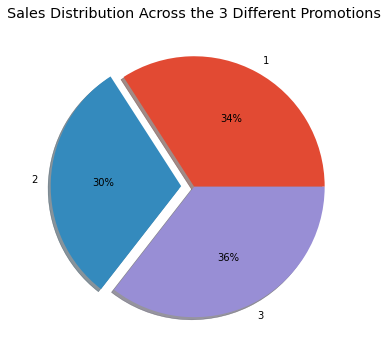

In [ ]:
# plotting sales and marketing data

# Using ggplot's style
ax = df.groupby('Promotion').sum()['SalesInThousands'].plot.pie(figsize=(6,6),
                                                                autopct='%1.0f%%',
                                                                shadow=True,
                                                                explode = (0, 0.1, 0))
ax.set_ylabel('')
ax.set_title('Sales Distribution Across the 3 Different Promotions')

plt.show()

As we see from this analysis, there is no big difference in results. Let's conduct more analysis.

Now let's view the promotions for each market size

In [ ]:
df.groupby(['Promotion', 'MarketSize']).count()['MarketID']

Promotion  MarketSize
1          Large          56
           Medium         96
           Small          20
2          Large          64
           Medium        108
           Small          16
3          Large          48
           Medium        116
           Small          24
Name: MarketID, dtype: int64

In [ ]:
# Using unstack
df.groupby(['Promotion', 'MarketSize']).count()['MarketID'].unstack('MarketSize')

MarketSize,Large,Medium,Small
Promotion,,,
1,56,96,20
2,64,108,16
3,48,116,24


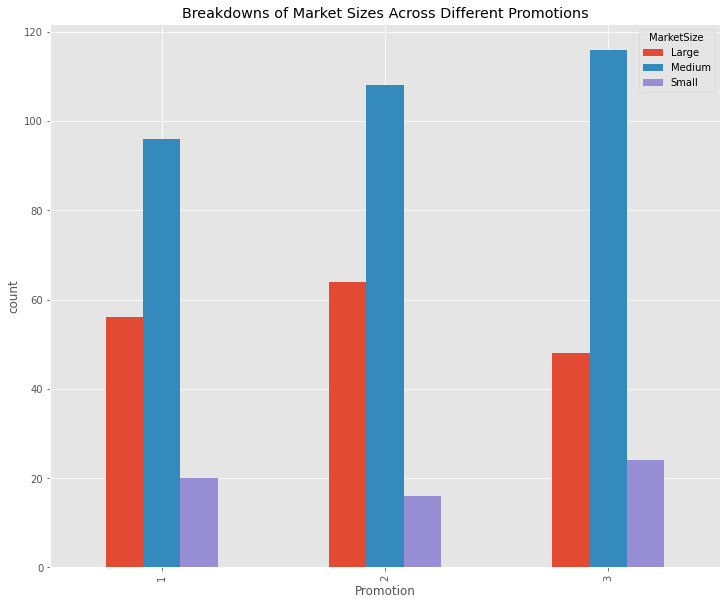

In [ ]:
# Put this into a plot
ax = df.groupby(['Promotion', 'MarketSize']).count()['MarketID'].unstack('MarketSize').plot(
    kind='bar',
    figsize=(12,10),
    grid=True)

ax.set_ylabel('count')
ax.set_title('Breakdowns of Market Sizes Across Different Promotions')

plt.show()

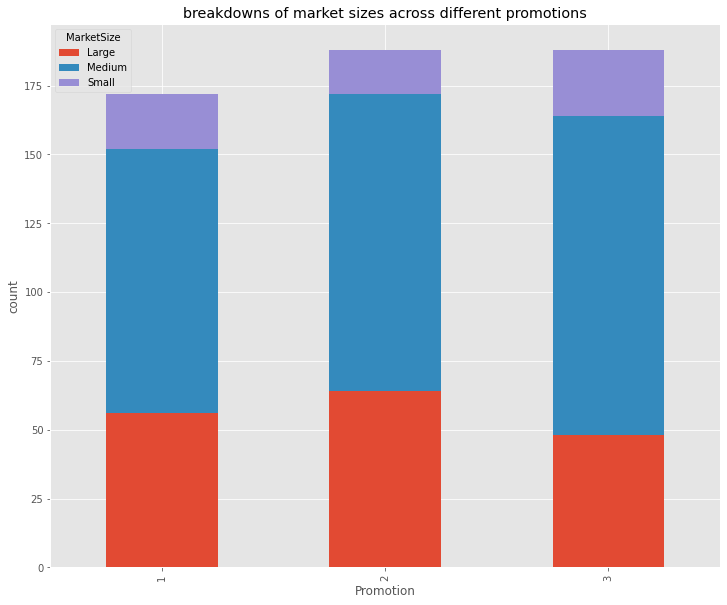

In [ ]:
# Put this into a different plot
ax = df.groupby(['Promotion', 'MarketSize']).count()['MarketID'].unstack('MarketSize').plot(
    kind='bar',
    figsize=(12,10),
    grid=True,
    stacked=True)

ax.set_ylabel('count')
ax.set_title('breakdowns of market sizes across different promotions')

plt.show()

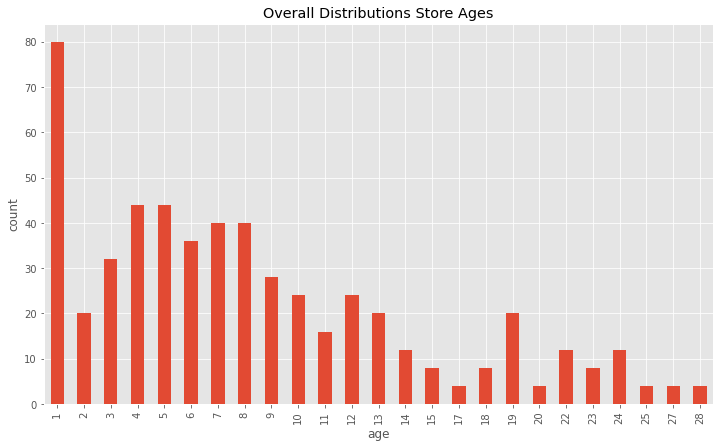

In [ ]:
ax = df.groupby('AgeOfStore').count()['MarketID'].plot(
    kind='bar', 
    figsize=(12,7),
    grid=True)

ax.set_xlabel('age')
ax.set_ylabel('count')
ax.set_title('Overall Distributions Store Ages')

plt.show()

As we see there are larg amount of 1-year-old stores.

Now let's Group by Age of Store and Promotion to get counts.

In [ ]:
df.groupby(['AgeOfStore', 'Promotion']).count()['MarketID']

AgeOfStore  Promotion
1           1            24
            2            36
            3            20
2           1             8
            2             8
            3             4
3           1            16
            2            12
            3             4
4           1            16
            2            12
            3            16
5           1             8
            2            12
            3            24
6           1            20
            2             4
            3            12
7           1             4
            2            24
            3            12
8           1            12
            2             8
            3            20
9           1             8
            2            12
            3             8
10          2            16
            3             8
11          1             4
            3            12
12          1            12
            2             4
            3             8
13          1            1

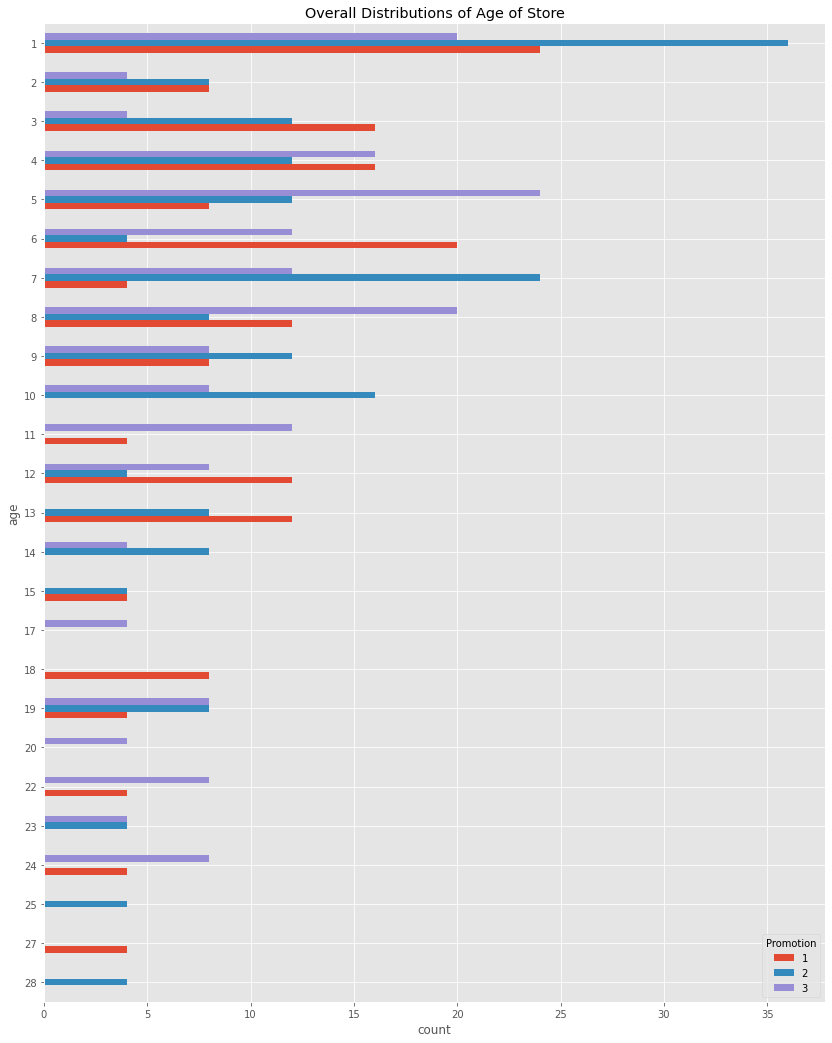

In [ ]:
# Visaulize this summary
ax = df.groupby(['AgeOfStore', 'Promotion']).count()['MarketID'].unstack('Promotion').iloc[::-1].plot(
    kind='barh', 
    figsize=(14,18),
    grid=True)

ax.set_ylabel('age')
ax.set_xlabel('count')
ax.set_title('Overall Distributions of Age of Store')

plt.show()

In [ ]:
df.groupby('Promotion').describe()['AgeOfStore']

,count,mean,std,min,25%,50%,75%,max
Promotion,,,,,,,,
1,172.0,8.279070,6.636160,1.0,3.0,6.0,12.0,27.0
2,188.0,7.978723,6.597648,1.0,3.0,7.0,10.0,28.0
3,188.0,9.234043,6.651646,1.0,5.0,8.0,12.0,24.0


This table makes it easy to understand the overall store age distribution from our summary stats.

All test groups have similar age profiles and the average store ages  is ~8 to 9 years old for theese 3 groups.

The majority of the stores are 10–12 years old or even younger.

We can see that the store profiles are similar to each other. 

This indicates that our sample groups are well controlled and the A/B testing results will be meaningful and trustworthy.

#### Performing A/B Testing

In [ ]:
means = df.groupby('Promotion').mean()['SalesInThousands']
stds = df.groupby('Promotion').std()['SalesInThousands']
ns = df.groupby('Promotion').count()['SalesInThousands']
print("\nMean\n", means)
print("\n---------------\n")
print("Standard Deviation\n", stds)
print("\n----------------\n")
print("Number of Samples\n", ns)


Mean
 Promotion
1    58.099012
2    47.329415
3    55.364468
Name: SalesInThousands, dtype: float64

---------------

Standard Deviation
 Promotion
1    16.553782
2    15.108955
3    16.766231
Name: SalesInThousands, dtype: float64

----------------

Number of Samples
 Promotion
1    172
2    188
3    188
Name: SalesInThousands, dtype: int64


**T-Value**

The t-value measures the degree of difference relative to the variation in our data groups. Large t-values indicate a higher degree of difference between the grups. 

**P-Value**

P-value measures the probability that the results would occur by random chance. Therefore the smaller the p-value is, the more statistically significant difference there will be between the two groups

#### **Comparing Promotion 1 vs Promotion 2 in an A/B Test**

In [ ]:
# Computing the t and p values using scipy 
from scipy import stats

t, p = stats.ttest_ind(df.loc[df['Promotion'] == 1, 'SalesInThousands'].values,
                       df.loc[df['Promotion'] == 2, 'SalesInThousands'].values, 
                       equal_var=False)
print("t-value = " +str(t))
print("p-value = " +str(p))

t-value = 6.42752867090748
p-value = 4.2903687179871785e-10


*Analysis of P and t-values*

Null Hypothesis: There is no difference bedween 2 groups.

Our **P-Value is close to 0** which suggests that there is good evidence to **REJECT the Null Hypothesis**. Meaning the there is a statistical difference between the two groups. Our threshold rejectings the Null is usually less than 0.05.

Our **t-test** shows that the marketing performances for these two groups are significantly different and that promotion group 1 outperforms promotion group 2. 


#### **Comparing Promotion 1 vs Promotion 3 in an A/B Test**

However, if we run a t-test between the promotion group 1 and promotion group 3, we see different results:

In [ ]:
t, p = stats.ttest_ind(
    df.loc[df['Promotion'] == 1, 'SalesInThousands'].values, 
    df.loc[df['Promotion'] == 3, 'SalesInThousands'].values, 
    equal_var=False)

print("t-value = " +str(t))
print("p-value = " +str(p))

t-value = 1.5560224307758634
p-value = 0.12059147742229478


t-value is smaller, which means, compared data is lot more similat then in previouse case.

p-valu is higher, then our treshhold 0.05, 

This means that we can't conclude anythign from this result to reject our Null Hypothesis

in this case we have to accept our Null hypothesis, there is no statistically significent diferent between this groups.

*Analysis of P and t-values*

We note that the average sales from promotion group 1 (58.1) is  higher than those from promotion group 2 (55.36). 

But, running a t-test between these two groups, gives us a t-value of 1.556 and a p-value of 0.121. 

The computed **p-value is a lot higher than 0.05**, past the threshold for statistical significance.